In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Asthma Detection Dataset Version 2'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[0]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 1211:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

1211

In [5]:
paths[:5]

['Asthma Detection Dataset Version 2\\asthma\\Asthma_RS_20 (1).wav',
 'Asthma Detection Dataset Version 2\\asthma\\Asthma_RS_20 (10).wav',
 'Asthma Detection Dataset Version 2\\asthma\\Asthma_RS_20 (100).wav',
 'Asthma Detection Dataset Version 2\\asthma\\Asthma_RS_20 (101).wav',
 'Asthma Detection Dataset Version 2\\asthma\\Asthma_RS_20 (102).wav']

In [6]:
labels[:5]

['asthma', 'asthma', 'asthma', 'asthma', 'asthma']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['sound'] = paths
df['label'] = labels

In [8]:
df.head()

,sound,label
0,Asthma Detection Dataset Version 2\asthma\Asth...,asthma
1,Asthma Detection Dataset Version 2\asthma\Asth...,asthma
2,Asthma Detection Dataset Version 2\asthma\Asth...,asthma
3,Asthma Detection Dataset Version 2\asthma\Asth...,asthma
4,Asthma Detection Dataset Version 2\asthma\Asth...,asthma


In [9]:
df.tail()

,sound,label
1206,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia
1207,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia
1208,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia
1209,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia
1210,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia


In [10]:
df.sample(20)

,sound,label
932,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia
482,Asthma Detection Dataset Version 2\copd\COPD_M...,copd
890,Asthma Detection Dataset Version 2\healthy\Hea...,healthy
1108,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia
825,Asthma Detection Dataset Version 2\healthy\Hea...,healthy
588,Asthma Detection Dataset Version 2\copd\COPD_M...,copd
502,Asthma Detection Dataset Version 2\copd\COPD_M...,copd
372,Asthma Detection Dataset Version 2\Bronchial\B...,bronchial
799,Asthma Detection Dataset Version 2\healthy\Hea...,healthy
652,Asthma Detection Dataset Version 2\copd\COPD_M...,copd


In [11]:
df.sample(30)

,sound,label
326,Asthma Detection Dataset Version 2\Bronchial\B...,bronchial
1155,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia
41,Asthma Detection Dataset Version 2\asthma\Asth...,asthma
504,Asthma Detection Dataset Version 2\copd\COPD_M...,copd
71,Asthma Detection Dataset Version 2\asthma\Asth...,asthma
29,Asthma Detection Dataset Version 2\asthma\Asth...,asthma
110,Asthma Detection Dataset Version 2\asthma\Asth...,asthma
1176,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia
949,Asthma Detection Dataset Version 2\pneumonia\P...,pneumonia
354,Asthma Detection Dataset Version 2\Bronchial\B...,bronchial


In [12]:
df['label'].value_counts()

label
copd         401
asthma       288
pneumonia    285
healthy      133
bronchial    104
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

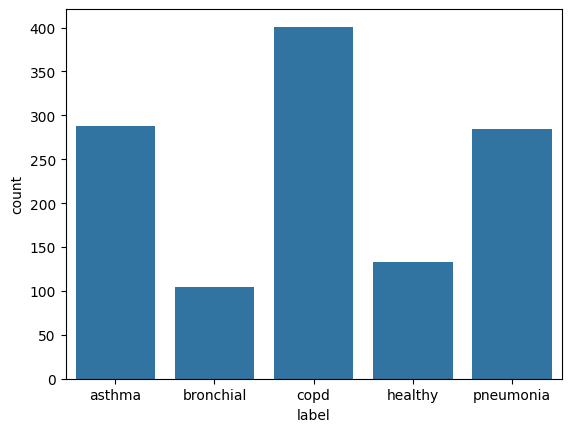

In [13]:
sns.countplot(data=df, x='label')

In [14]:
def waveplot(data, sr, audio):
    plt.figure(figsize=(10,4))
    plt.title(audio, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, audio):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(audio, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

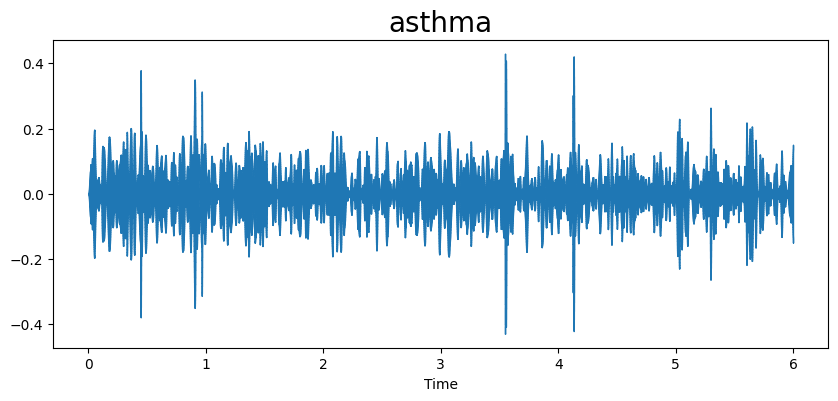

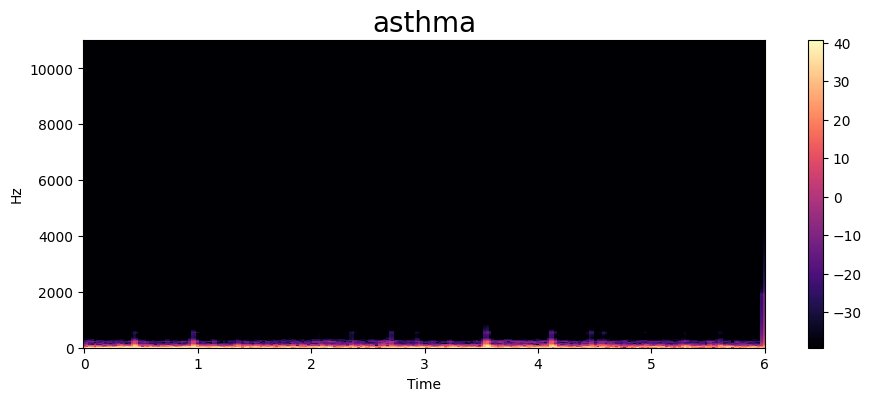

In [15]:
audio = 'asthma'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

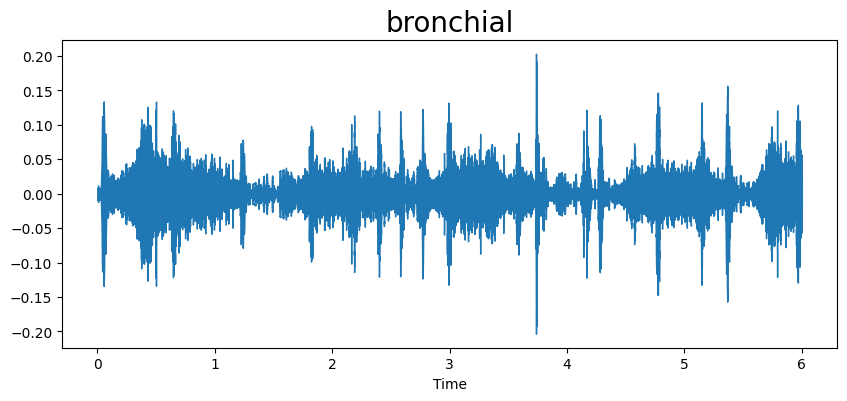

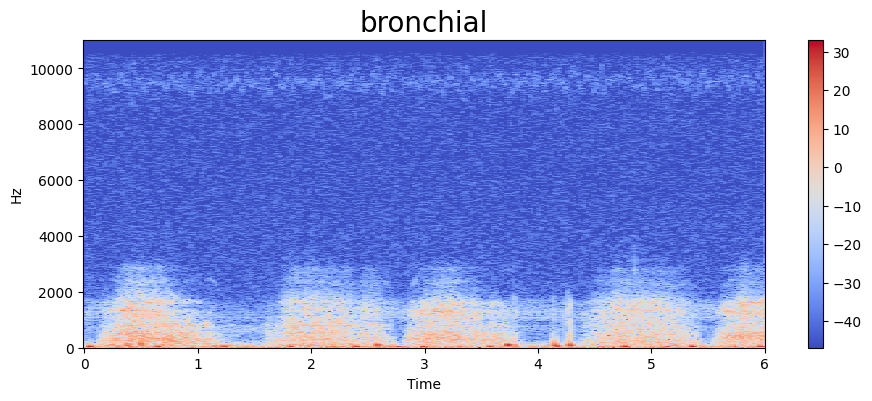

In [16]:
audio = 'bronchial'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

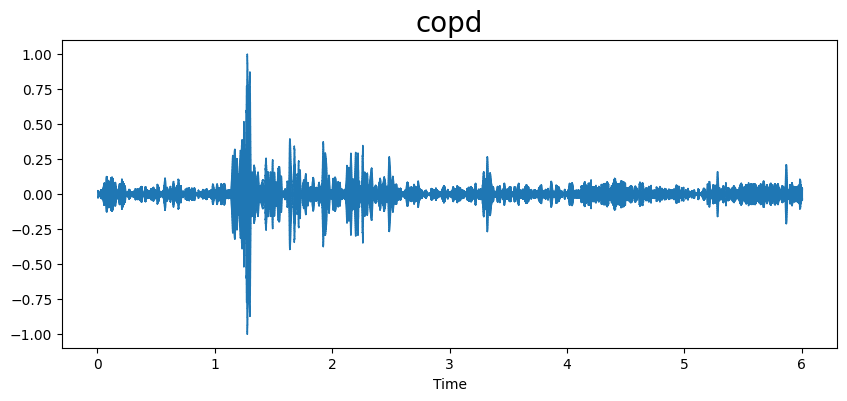

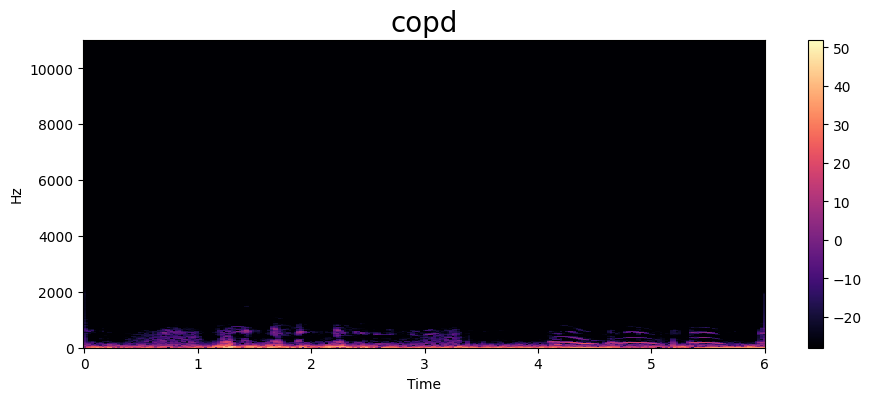

In [17]:
audio = 'copd'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

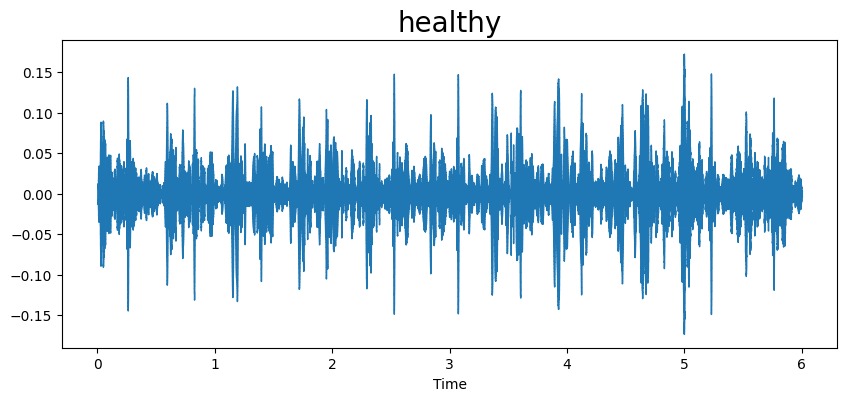

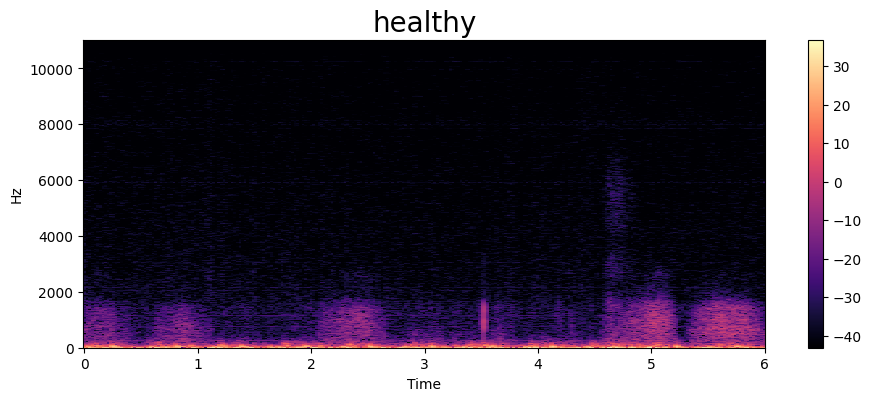

In [18]:
audio = 'healthy'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

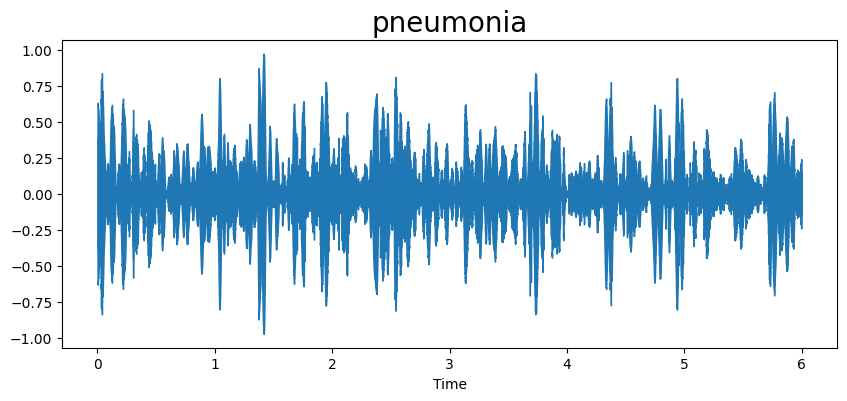

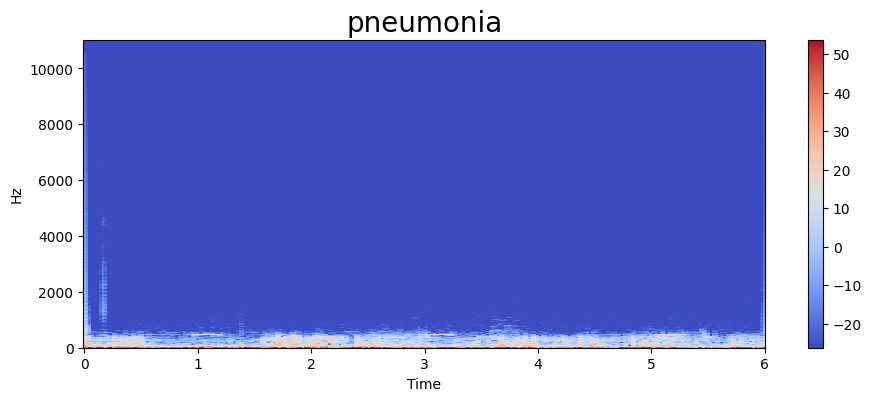

In [19]:
audio = 'pneumonia'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

In [20]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [21]:
extract_mfcc(df['sound'][0])

array([-548.83496  ,   50.119514 ,   45.78449  ,   43.384907 ,
         40.99531  ,   37.92376  ,   34.31658  ,   30.903397 ,
         27.728077 ,   24.546072 ,   21.37009  ,   18.457767 ,
         15.855426 ,   13.384048 ,   11.001728 ,    8.931421 ,
          7.295938 ,    5.979423 ,    4.9392314,    4.3285704,
          4.1767793,    4.285747 ,    4.5153503,    4.891299 ,
          5.3693304,    5.767992 ,    5.9868765,    6.0878544,
          6.109491 ,    5.9857993,    5.6918344,    5.316192 ,
          4.9219117,    4.4640946,    3.9046216,    3.3001502,
          2.7046251,    2.0866601,    1.4203374,    0.7722891],
      dtype=float32)

In [22]:
X_mfcc = df['sound'].apply(lambda x: extract_mfcc(x))

In [23]:
X_mfcc

0       [-548.83496, 50.119514, 45.78449, 43.384907, 4...
1       [-510.55096, 64.57206, 58.473934, 54.521935, 5...
2       [-491.56403, 122.547005, 97.057144, 68.30173, ...
3       [-410.38647, 96.17459, 71.43918, 44.839233, 25...
4       [-584.2018, 149.43059, 109.23822, 64.08953, 26...
                              ...                        
1206    [-472.8342, 57.394924, 52.172047, 48.309334, 4...
1207    [-514.3326, 67.60713, 61.357025, 55.430042, 48...
1208    [-408.67758, 100.07234, 81.82103, 62.381306, 4...
1209    [-451.33817, 125.4286, 52.841415, 16.206491, 1...
1210    [-385.91092, 113.33983, 90.27464, 67.36163, 44...
Name: sound, Length: 1211, dtype: object

In [24]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1211, 40)

In [25]:
y=np.array(df['label'].tolist())

In [26]:
y.shape

(1211,)

In [27]:
X

array([[-548.83496  ,   50.119514 ,   45.78449  , ...,    2.0866601,
           1.4203374,    0.7722891],
       [-510.55096  ,   64.57206  ,   58.473934 , ...,    2.840531 ,
           2.3669758,    1.8308487],
       [-491.56403  ,  122.547005 ,   97.057144 , ...,    4.366303 ,
           3.3435152,    2.3243194],
       ...,
       [-408.67758  ,  100.07234  ,   81.82103  , ...,    2.2515595,
           2.4373362,    2.8444352],
       [-451.33817  ,  125.4286   ,   52.841415 , ...,    1.9024341,
           2.301741 ,    1.5902761],
       [-385.91092  ,  113.33983  ,   90.27464  , ...,    1.5085611,
           1.7577705,    2.1316829]], dtype=float32)

In [28]:
y

array(['asthma', 'asthma', 'asthma', ..., 'pneumonia', 'pneumonia',
       'pneumonia'], dtype='<U9')

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
X_resampled.shape

(2005, 40)

In [31]:
y_resampled.shape

(2005,)

In [32]:
X_resampled

array([[-5.48834961e+02,  5.01195145e+01,  4.57844887e+01, ...,
         2.08666015e+00,  1.42033744e+00,  7.72289097e-01],
       [-5.10550964e+02,  6.45720596e+01,  5.84739342e+01, ...,
         2.84053111e+00,  2.36697578e+00,  1.83084869e+00],
       [-4.91564026e+02,  1.22547005e+02,  9.70571442e+01, ...,
         4.36630297e+00,  3.34351516e+00,  2.32431936e+00],
       ...,
       [-4.79628448e+02,  1.23179596e+02,  5.41606674e+01, ...,
        -4.48403448e-01,  2.29700789e-01,  6.30438566e-01],
       [-4.96546539e+02,  1.02657547e+02,  5.94003410e+01, ...,
         9.22891736e-01,  1.54411340e+00,  1.38727260e+00],
       [-4.69754822e+02,  9.63708801e+01,  6.30505295e+01, ...,
         4.35085803e-01,  7.85743356e-01,  8.84941578e-01]], dtype=float32)

In [33]:
y_resampled

array(['asthma', 'asthma', 'asthma', ..., 'pneumonia', 'pneumonia',
       'pneumonia'], dtype='<U9')

In [34]:
np.unique(y, return_counts=True)

(array(['asthma', 'bronchial', 'copd', 'healthy', 'pneumonia'], dtype='<U9'),
 array([288, 104, 401, 133, 285], dtype=int64))

In [35]:
np.unique(y_resampled, return_counts=True)

(array(['asthma', 'bronchial', 'copd', 'healthy', 'pneumonia'], dtype='<U9'),
 array([401, 401, 401, 401, 401], dtype=int64))

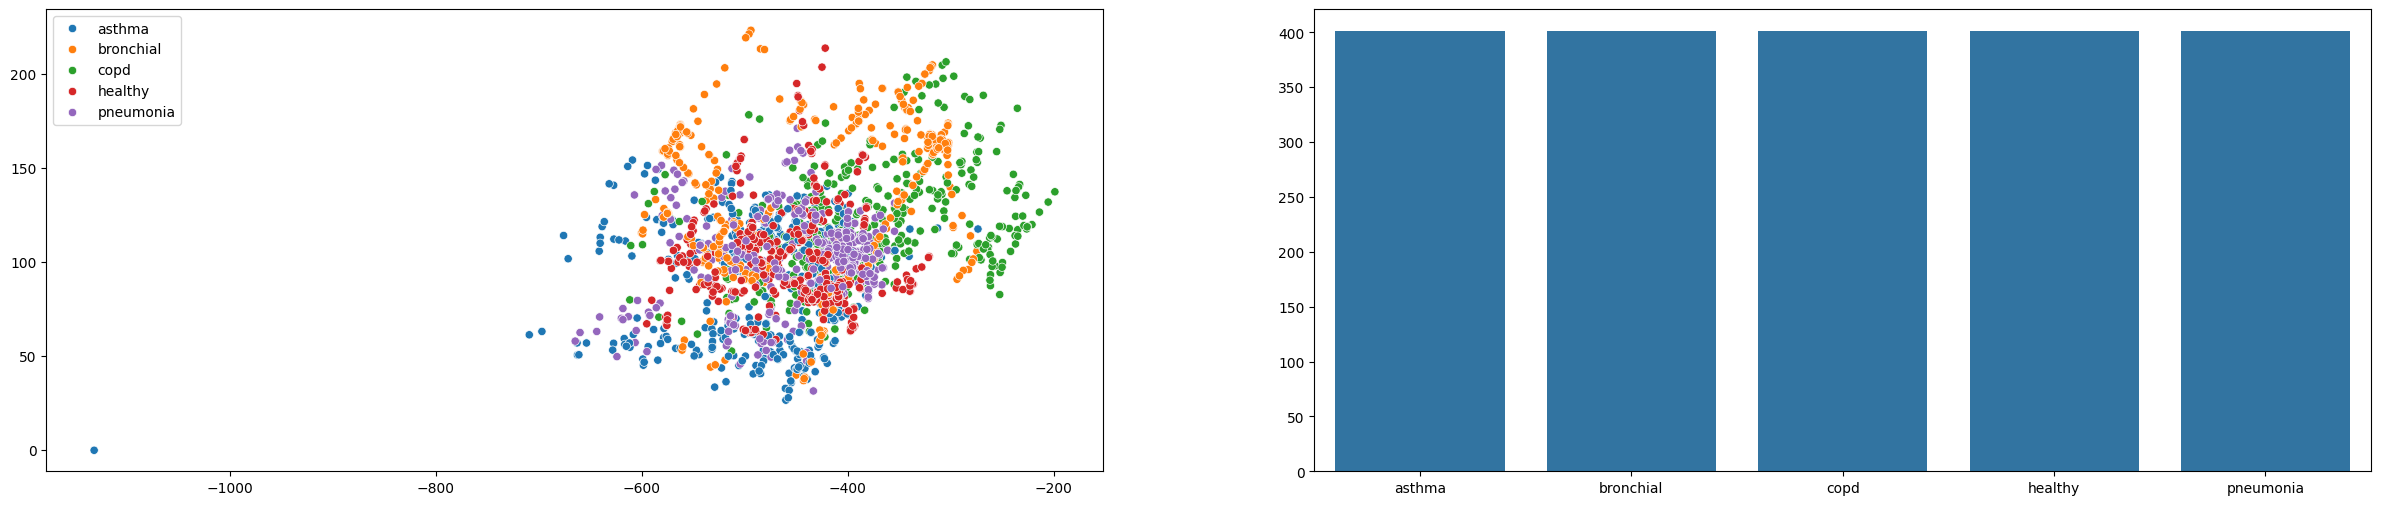

In [36]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(30,6))
sns.scatterplot(x=X_resampled[:,0], y=X_resampled[:,1], hue=y_resampled, ax=ax[0])
idx, c=np.unique(y_resampled, return_counts=True)
sns.barplot(x=idx, y=c, ax=ax[1])
plt.show()

In [37]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_resampled=to_categorical(labelencoder.fit_transform(y_resampled))

In [38]:
y_resampled.shape

(2005, 5)

In [39]:
X_resampled

array([[-5.48834961e+02,  5.01195145e+01,  4.57844887e+01, ...,
         2.08666015e+00,  1.42033744e+00,  7.72289097e-01],
       [-5.10550964e+02,  6.45720596e+01,  5.84739342e+01, ...,
         2.84053111e+00,  2.36697578e+00,  1.83084869e+00],
       [-4.91564026e+02,  1.22547005e+02,  9.70571442e+01, ...,
         4.36630297e+00,  3.34351516e+00,  2.32431936e+00],
       ...,
       [-4.79628448e+02,  1.23179596e+02,  5.41606674e+01, ...,
        -4.48403448e-01,  2.29700789e-01,  6.30438566e-01],
       [-4.96546539e+02,  1.02657547e+02,  5.94003410e+01, ...,
         9.22891736e-01,  1.54411340e+00,  1.38727260e+00],
       [-4.69754822e+02,  9.63708801e+01,  6.30505295e+01, ...,
         4.35085803e-01,  7.85743356e-01,  8.84941578e-01]], dtype=float32)

In [40]:
y_resampled

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [41]:
X_resampled.shape

(2005, 40)

In [42]:
y_resampled.shape

(2005, 5)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)

In [44]:
X_train

array([[-5.75152100e+02,  6.93617935e+01,  5.48557549e+01, ...,
         1.88950646e+00,  1.69608390e+00,  1.20657635e+00],
       [-4.02211609e+02,  9.46986771e+01,  5.89261780e+01, ...,
         1.82643723e+00,  2.44722754e-01, -3.70863616e-01],
       [-4.77032867e+02,  1.20868042e+02,  5.64808655e+01, ...,
         6.10798039e-02,  4.33665454e-01,  2.71079212e-01],
       ...,
       [-4.84113190e+02,  1.14587006e+02,  4.15470352e+01, ...,
         1.10013235e+00,  3.49691749e-01,  1.18099129e+00],
       [-3.99894287e+02,  1.16806595e+02,  5.40612411e+01, ...,
         8.57568979e-01,  2.63239563e-01, -6.58950865e-01],
       [-4.40016235e+02,  1.02298325e+02,  6.68499146e+01, ...,
         2.66842890e+00,  1.67758262e+00,  6.89723551e-01]], dtype=float32)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1604, 40)
(401, 40)
(1604, 5)
(401, 5)


In [46]:
import tensorflow as tf

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from sklearn import metrics

In [54]:
model=Sequential()

###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.3))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.3))

###final layer
model.add(Dense(5))
model.add(Activation('softmax'))

In [55]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             505 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,905 (175.41 KB)

 Trainable params: 44,905 (175.41 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [57]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/Asthma_audioclassification.keras',
                              verbose=1, save_best_only=True)

start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
          
duration = datetime.now() - start
print("Training time", duration)

Epoch 1/150
36/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1919 - loss: 33.8253   
Epoch 1: val_loss improved from inf to 1.90047, saving model to saved_models/Asthma_audioclassification.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1979 - loss: 29.9292 - val_accuracy: 0.2045 - val_loss: 1.9005
Epoch 2/150
34/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2280 - loss: 7.1544 
Epoch 2: val_loss improved from 1.90047 to 1.57572, saving model to saved_models/Asthma_audioclassification.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2259 - loss: 6.6593 - val_accuracy: 0.2594 - val_loss: 1.5757
Epoch 3/150
40/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2595 - loss: 2.9680 
Epoch 3: val_loss did not improve from 1.57572
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2558 - loss: 2.9096 - val_accuracy: 0.1995 - val_loss: 1.6104
Epoch 4/150
36/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2016 - loss: 2.0635 
Epoch 4: val_loss did not improve fr

In [58]:
model.evaluate(X_test,y_test,verbose=0)

[0.3847678303718567, 0.9002493619918823]

In [59]:
filename="Asthma Detection Dataset Version 2\\asthma\\Asthma_RS_20 (1).wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class


[[-548.83496     50.119514    45.78449     43.384907    40.99531
    37.92376     34.31658     30.903397    27.728077    24.546072
    21.37009     18.457767    15.855426    13.384048    11.001728
     8.931421     7.295938     5.979423     4.9392314    4.3285704
     4.1767793    4.285747     4.5153503    4.891299     5.3693304
     5.767992     5.9868765    6.0878544    6.109491     5.9857993
     5.6918344    5.316192     4.9219117    4.4640946    3.9046216
     3.3001502    2.7046251    2.0866601    1.4203374    0.7722891]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[0]


array(['asthma'], dtype='<U9')

In [60]:
filename="Asthma Detection Dataset Version 2\Bronchial\Bronchial_Sc_1 (1).wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-3.8983014e+02  1.8178264e+02  2.1946053e+01 -1.5424136e+01
   1.3209252e+01  1.8196669e+01  7.7502036e+00  6.2696522e-01
   6.6663593e-01  5.2164898e+00  9.5117359e+00  6.4938064e+00
  -2.1969423e+00  4.3192797e+00  4.2819500e+00  3.9133751e+00
   1.8397973e-01  9.0698242e+00  3.1407807e+00  4.5960984e+00
  -2.8902512e+00  2.9254174e+00 -1.1361605e-01  6.3802347e+00
  -9.9346149e-01  5.8656082e+00  3.1182034e+00  6.5837083e+00
  -2.4030316e+00  1.1249828e+00 -2.7190251e+00  3.4650650e+00
   4.3189314e-01  2.8748198e+00 -2.7851725e+00  1.3261629e+00
   2.7799010e+00  3.6490676e+00 -2.2812161e+00 -4.8443222e-01]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[1]


array(['bronchial'], dtype='<U9')

In [61]:
filename="Asthma Detection Dataset Version 2\Bronchial\Bronchial_Sc_1 (8).wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-4.5608768e+02  1.7521689e+02  5.2230350e+01 -1.3782601e+00
  -4.3475981e+00  3.0727172e+00 -6.5864635e-01  2.1587160e+00
   1.4168003e+01  2.2654135e+01  1.4551707e+01  3.4448764e+00
   4.7594452e-01  8.8251476e+00  8.9229660e+00  5.2574186e+00
  -1.7476784e+00  2.4893077e-01  2.7135258e+00  7.2230697e+00
   5.8852682e+00  7.4056950e+00  2.2178140e+00  1.3237664e+00
   9.3586162e-02  2.8307562e+00  8.4737867e-01  1.9972440e+00
   1.8681623e+00  5.0061994e+00  1.6391280e+00  3.8139215e-01
  -1.1640850e+00  1.9350014e+00  1.4548314e+00  1.4240146e+00
  -7.2621983e-01  9.7914219e-01  1.7796893e+00  3.4094405e+00]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[1]


array(['bronchial'], dtype='<U9')

In [62]:
filename="Asthma Detection Dataset Version 2\pneumonia\Pneumonia_10T (5).wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-385.1813     113.2246      87.42339     64.046234    45.475803
    31.254955    19.582722    10.06814      3.4867895    1.1309445
     2.2522495    4.13407      5.300241     5.9561915    6.156539
     5.829645     5.2794957    4.7358866    4.2662005    3.8962717
     3.2000952    2.0528636    1.4345835    2.102308     3.0735042
     3.2031195    2.614724     1.9900856    1.740515     1.8590331
     1.8391153    1.2675236    0.5058664    0.3985395    0.7895945
     0.881756     0.6754371    1.0320972    2.1741264    3.1455822]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[4]


array(['pneumonia'], dtype='<U9')

In [ ]:
filename=
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class